**Convolutional Neural Networks (CNN)**
# Oğuzhan Özer
<font color='red'><br> Content

* [Introduction:](#1)
* [Loading the Data Set:](#2)
* [Train-Test Split:](#3)
* [Convolutional Neural Network(Implementing with Keras):](#4)
* [Define Optimizer:](#5)
* [Compile Model:](#6) 
* [Data Augmentation](#7)
* [Epochs and Batch Size:](#8)
* [Fit the Model:](#9)
* [Evaluate the model:](#10)
* [Conclusion:](#11)
    



<a id="1"></a> <br>
# Introduction
* We will be working on Sign language dataset by implementing with Keras in this notebook.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "../input/Sign-language-digits-dataset"]).decode("utf8"))
# Any results you write to the current directory are saved a

X.npy
Y.npy



<a id="2"></a> <br>
# Loading the Data Set
* In this part we load and visualize the data.

(-0.5, 63.5, 63.5, -0.5)

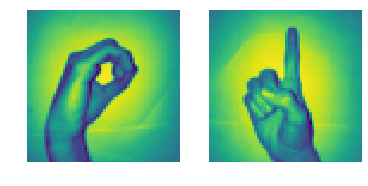

In [2]:
# load data set
x = np.load('../input/Sign-language-digits-dataset/X.npy')
y = np.load('../input/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[900].reshape(img_size, img_size))
plt.axis('off')

<a id="3"></a> <br>
# Train Test Split
* We split the data into train and test sets.
    * test size is 10%
    * train size is 90%.

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)
#reshape
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
#print x_train and y_train shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1855, 64, 64, 1)
(1855, 10)
(207, 64, 64, 1)
(207, 10)


from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size = 0.1, random_state=2)
X_train = X_train.reshape(-1,64,64,1)
X_val = X_val.reshape(-1,64,64,1)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

<a id="4"></a> <br>
# Implementing with Keras


In [4]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(2,2),activation="relu",padding="same")) 
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)  

<a id="5"></a> <br>
# Define Optimizer
* Adam optimizer: Change the learning rate

In [5]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

<a id="6"></a> <br>
# Compile Model
* categorical crossentropy
    * We make binary cross entropy at previous parts and in machine learning tutorial
    * At this time we use categorical crossentropy. That means that we have multi class.
![](https://image.ibb.co/cTvQh9/cce.jpg)

In [6]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="7"></a> <br>
# Data Augmentation
  * To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
  * Alter the training data with small transformations to reproduce the variations of digit.
  * For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
![](https://preview.ibb.co/nMxXUp/augment.jpg) 

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.3, # Randomly zoom image 5%
        width_shift_range=0.3,  # randomly shift images horizontally 5%
        height_shift_range=0.3,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

<a id="8"></a> <br>
# Epochs and Batch Size

In [8]:
epochs = 200  # for better result increase the epochs
batch_size = 250

<a id="9"></a> <br>
# Fit the model

In [9]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
7/7 [==============================] - 10s 1s/step - loss: 2.3176 - acc: 0.1086 - val_loss: 2.3014 - val_acc: 0.1643
Epoch 2/200
7/7 [==============================] - 8s 1s/step - loss: 2.3041 - acc: 0.0981 - val_loss: 2.3041 - val_acc: 0.1063
Epoch 3/200
7/7 [==============================] - 8s 1s/step - loss: 2.3039 - acc: 0.1036 - val_loss: 2.3036 - val_acc: 0.1063
Epoch 4/200
7/7 [==============================] - 8s 1s/step - loss: 2.3022 - acc: 0.1032 - val_loss: 2.3041 - val_acc: 0.0966
Epoch 5/200
7/7 [==============================] - 8s 1s/step - loss: 2.3021 - acc: 0.0981 - val_loss: 2.3046 - val_acc: 0.0821
Epoch 6/200
7/7 [==============================] - 8s 1s/step - loss: 2.3024 - acc: 0.1012 - val_loss: 2.3046 - val_acc: 0.0821
Epoch 7/200
7/7 [==============================] - 8s 1s/step - loss: 2.3022 - acc: 0.1100 - val_loss: 2.3047 - val_acc: 0.0821
Epoch 8/200
7/7 [==============================] - 8s 1

<a id="10"></a> <br>
# Evaluate the model
 * Validation and Loss visualization
 * Confusion matrix

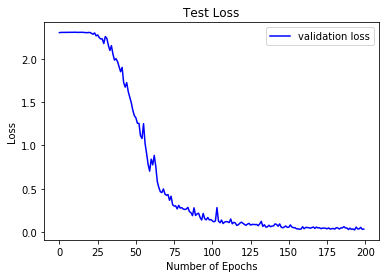

In [10]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

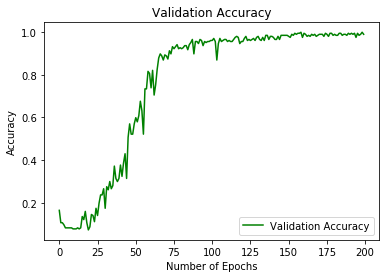

In [11]:
# Plot the accuracy curve for validation 
plt.plot(history.history['val_acc'], color='g', label="Validation Accuracy")
plt.title("Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

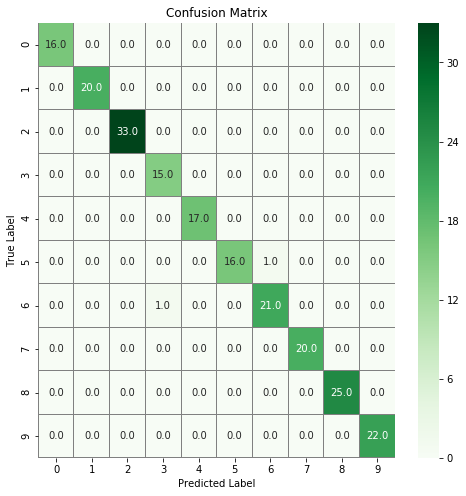

In [12]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()